In [ ]:
import tensorflow as tf #deep learning
from tensorflow.keras.models import Sequential #everything is executed sequentially
from tensorflow.keras.layers import Dense,Dropout, Flatten, Input # dense means fully connected layers where each neuron is connected with every other neuron
# dropout for regu flatten means it converts flattens the input to 1d array input is for neural networks
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input




In [ ]:
dataset_name = 'cifar10'
if dataset_name == 'mnist':
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
elif dataset_name == 'cifar10':
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
X_train = X_train / 255.0;
X_test = X_test / 255.0;  #getting it to a suitable range basically normalizing so 0-1

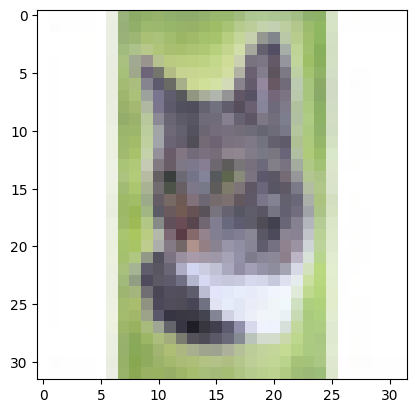

In [ ]:
plt.imshow(random.choice(X_train))
plt.show()

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [ ]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

model = Sequential([
    Input(shape=(32, 32, 3)),  # Define input shape once here

    # First convolutional block
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional block
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Third convolutional block
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten and Dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
# Change the loss function to handle one-hot encoded labels
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 83ms/step - accuracy: 0.3063 - loss: 1.8546 - val_accuracy: 0.5851 - val_loss: 1.1886
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 85ms/step - accuracy: 0.5757 - loss: 1.1960 - val_accuracy: 0.6688 - val_loss: 0.9561
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 130s 83ms/step - accuracy: 0.6612 - loss: 0.9781 - val_accuracy: 0.6820 - val_loss: 0.9355
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 83ms/step - accuracy: 0.7051 - loss: 0.8613 - val_accuracy: 0.7133 - val_loss: 0.8508
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 86ms/step - accuracy: 0.7375 - loss: 0.7604 - val_accuracy: 0.7213 - val_loss: 0.8267
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 83ms/step - accuracy: 0.7540 - loss: 0.7081 - val_accuracy: 0.7319 - val_loss: 0.7979
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 83ms/step - accuracy: 0.7754 - loss: 0.6483 - val_accuracy: 0.7297 - val_loss: 0.8008
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 84ms/step - accuracy: 

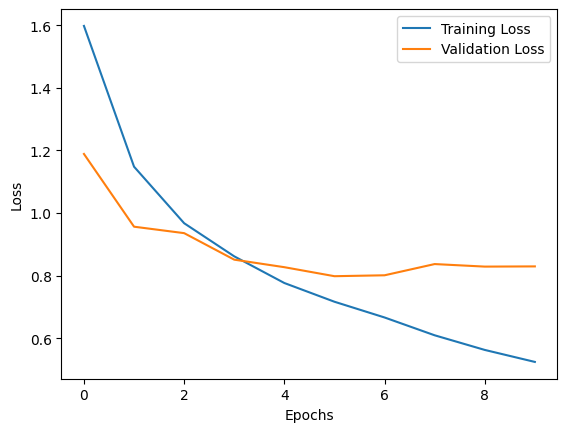

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


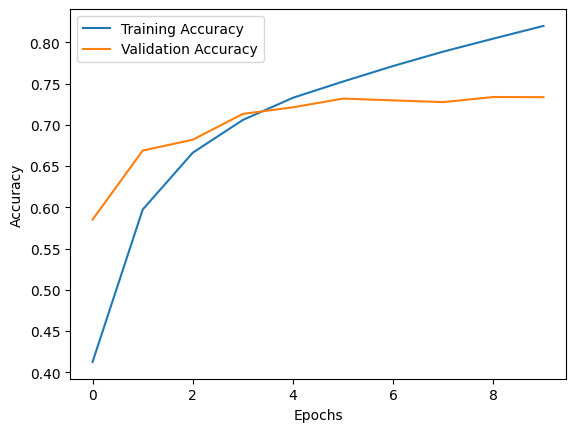

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.7319 - loss: 0.8248


In [ ]:

y_preds = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


Actual label: 5
Predicted label: 5


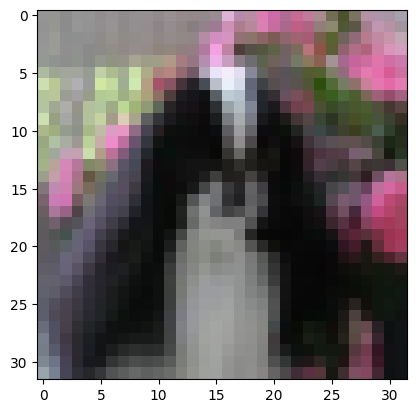

In [ ]:
plt.imshow(X_test[42])
print(f'Actual label: {np.argmax(y_test[42])}')
print(f'Predicted label: {np.argmax(y_preds[42])}')
plt.show()

In [ ]:
y_preds

array([[7.07715344e-06, 6.01918737e-06, 1.13134178e-04, ...,
        9.99689102e-01, 3.69002350e-07, 2.12380528e-05],
       [9.23392508e-05, 2.27728251e-05, 9.96013701e-01, ...,
        2.22250310e-06, 7.85743061e-04, 1.87645071e-07],
       [7.21692641e-06, 9.94733810e-01, 8.77489103e-04, ...,
        1.12694234e-03, 5.86273964e-04, 7.50877953e-05],
       ...,
       [2.63396807e-08, 2.24216777e-07, 9.77194759e-07, ...,
        2.22809540e-05, 4.91341452e-05, 2.13858904e-03],
       [5.42653084e-04, 1.25216407e-04, 3.36059406e-06, ...,
        3.20558524e-06, 2.72608874e-03, 1.10719175e-05],
       [4.07422431e-06, 3.48211451e-08, 2.68503936e-05, ...,
        1.00367945e-08, 1.83276802e-06, 1.38087408e-08]], dtype=float32)